In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 기본 테마 설정
# https://coldbrown.co.kr/2023/07/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%A0%84%ED%8E%B8-08-seaborn-sns-set%EC%9D%84-%ED%86%B5%ED%95%B4-%EC%8A%A4%ED%83%80%EC%9D%BC-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

### 01_복권 1장 뽑기 시뮬레이션

In [4]:
### 01_복권 1장 뽑기 시뮬레이션# 코드를 실행할 때 마다 같은 결과를 보기 위해 랜덤시드를 고정한다.
np.random.seed(4)

In [6]:
# 복권을 1장 뽑는 시뮬레이션을 실행한다.
# 간단하지만 파이썬으로 시뮬레이션 하는 방법은 다른 분야에도 응용할 수 있다.
# 넘파이 배열로 10장짜리 복권 변수 lottery를 준비한다.
# 숫자 1이 당첨이고 0이 꽝이다.
lottery = np.array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0])
lottery

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [8]:
# 위처럼 이미 당첨복권과 꽝 복권의 구성을 알고 있다면
# 이를 통해 확률을 계산할 수 있다.
# 당첨인 1이 두 개이기 때문에...
sum(lottery) / len(lottery)

0.2

In [12]:
# 이제 복권을 1장 뽑는다.
# 첫번째 : 랜덤번째 뽑을 값을 가지고 있는 행렬
# 두번째 : 랜덤하게 뽑아낼 숫자의 수
print(np.random.choice(lottery, size=1))

[0]


In [14]:
print(np.random.choice(lottery, size=1))
print(np.random.choice(lottery, size=1))
print(np.random.choice(lottery, size=1))
print(np.random.choice(lottery, size=1))
print(np.random.choice(lottery, size=1))
print(np.random.choice(lottery, size=1))
print(np.random.choice(lottery, size=1))
print(np.random.choice(lottery, size=1))

[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


In [16]:
print(np.random.choice(lottery, size=10))
print(np.random.choice(lottery, size=10))
print(np.random.choice(lottery, size=10))
print(np.random.choice(lottery, size=10))
print(np.random.choice(lottery, size=10))

[0 0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 0 0 1]
[0 0 1 0 0 1 1 0 0 0]
[0 0 0 1 1 1 0 0 1 0]
[0 0 0 0 0 0 0 0 0 0]


In [20]:
# 10번을 추첨을 하여 당첨 확률을 계산해본다.
sample_1 = np.random.choice(lottery, size=10)
print(f'복권 뽑기 결과 : {sample_1}')
print(f'당첨 매수 : {np.sum(sample_1)}')
print(f'당첨 확률 : {np.sum(sample_1) / len(sample_1)}')

복권 뽑기 결과 : [0 0 0 0 1 0 0 0 0 0]
당첨 매수 : 1
당첨 확률 : 0.1


### 03_복권 10장 시행을 1만 회 반복하는 시뮬레이션

In [23]:
# 복권을 10장 뽑고 당첨 매수를 기록하는 시행을 1만번 시행한다.
# 복권 10장을 뽑는 시도 횟수
n_trial = 10000

# 결과를 담을 배열
binomial_result_array = np.zeros(n_trial)
binomial_result_array

array([0., 0., 0., ..., 0., 0., 0.])

In [25]:
# 10000번 반복한다.
np.random.seed(1)
# 반복한다.
for i in range(n_trial) :
    # 복권 10번을 뽑는다.
    sample = np.random.choice(lottery, size=10)
    # 당첨된 복권 개수를 담아준다.
    binomial_result_array[i] = np.sum(sample)

binomial_result_array

array([3., 0., 3., ..., 0., 2., 0.])

In [27]:
# 상대 도수분포를 얻는다. 계급은 0 ~ 10까지 1씩 증가로 설정한다.
np.histogram(binomial_result_array, bins=np.arange(0, 11, 1), density=True)

(array([1.118e-01, 2.711e-01, 2.992e-01, 1.977e-01, 8.890e-02, 2.430e-02,
        5.800e-03, 1.100e-03, 1.000e-04, 0.000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))

In [29]:
# 상대 도수분포를 얻는다. 계급은 0 ~ 10까지 1씩 증가로 설정한다.
np.histogram(binomial_result_array, bins=np.arange(0, 11, 1), density=True)

(array([1.118e-01, 2.711e-01, 2.992e-01, 1.977e-01, 8.890e-02, 2.430e-02,
        5.800e-03, 1.100e-03, 1.000e-04, 0.000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))

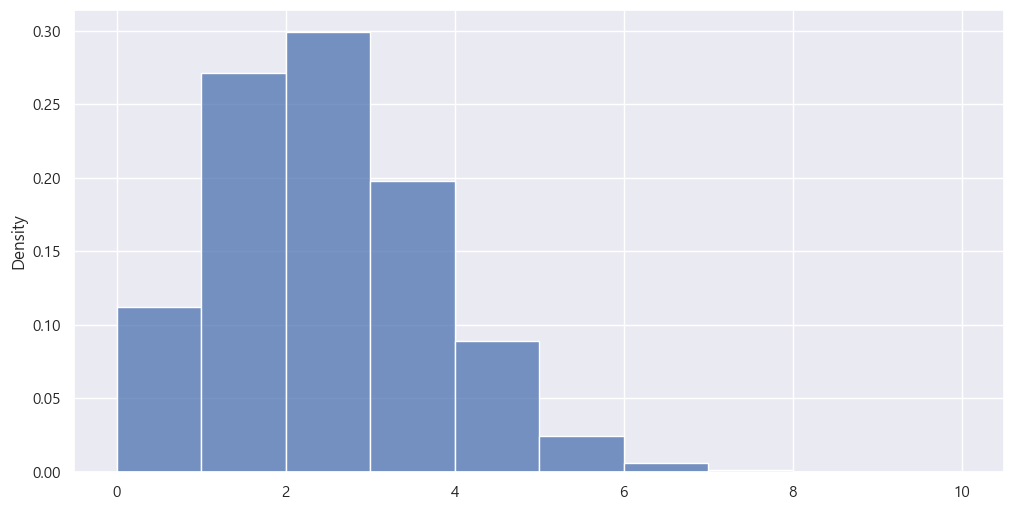

In [31]:
# 상대 도수 분포를 히스토그램으로 그려본다.
sns.histplot(binomial_result_array, bins=np.arange(0, 11, 1),
             stat='density')
plt.show()

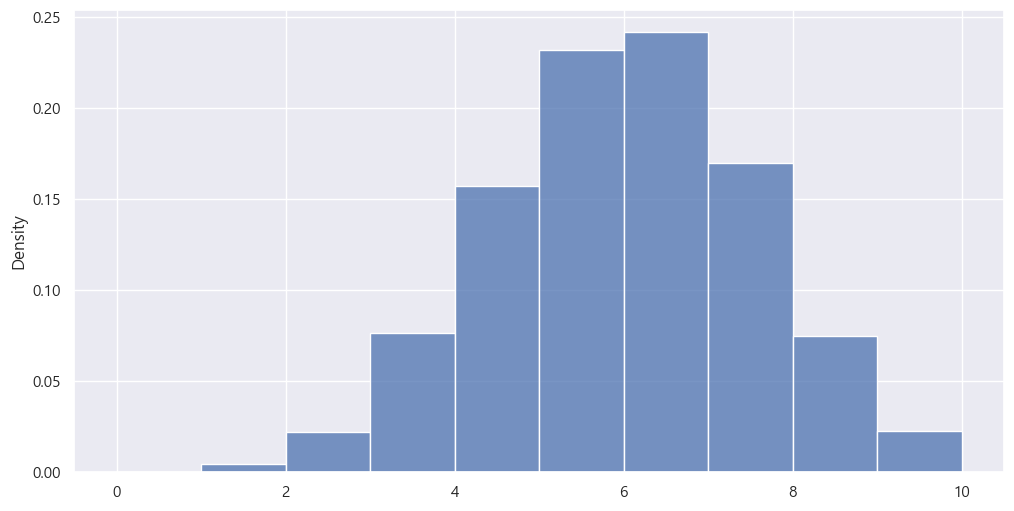

In [33]:
np.random.seed(1)
# 0 ~ 2 - 1 까지 정수 100개를 가지고 있는 행렬을 생성한다.
c = np.random.randint(0, 2, 100)

# 만번 수행한다.
n_trial2 = 10000

result2 = np.zeros(n_trial2)

for idx in range(n_trial2) :
    # 복권 10장을 뽑는다.
    sample2 = np.random.choice(c, size=10)
    result2[idx] = sum(sample2)

sns.histplot(result2, bins=np.arange(0, 11, 1),
             stat='density')
plt.show()

### 이항분포

In [36]:
# 파이썬을 사용해서 이항분포의 확률질량함수를 구현하자
# stats.binom.pmf 함수를 사용한다.
# k : 성공횟수, n : 베르누이 시도 횟수, p : 성공확률)
# 성공확률이 0.5인 사건에서 2번 시행했을 때 1이 나온 결과가 1번 있었다는 의미
stats.binom.pmf(k=1, n=2, p=0.5)

0.5000000000000002

In [38]:
# 이어서 당첨 확률이 0.2인 복권을 10장 뽑고 모두 꽝일 확률을 계산한다.
# 성공확률 : 0.2, 베르누이 시도 횟수 : 10, 성공 횟수 : 0
stats.binom.pmf(k=0, n=10, p=0.2)
# 복권을 10장 뽑아도 대략 10명 중 1명은 모두 꽝인 것으로 보인다.

0.10737418240000003

In [42]:
# 이항분포의 확률질량함수 그래프를 그려보자
# 성공 횟수
n_success = np.arange(0, 11)
# 확률
probs = stats.binom.pmf(k=n_success, n=10, p=0.2)
# 출력을 보기좋게 하기 위해 데이터 프레임으로 만들어준다.
probs_df = pd.DataFrame({
    'n_succss' : n_success,
    'probs' : probs
})
probs_df

,n_succss,probs
0,0,1.073742e-01
1,1,2.684355e-01
2,2,3.019899e-01
3,3,2.013266e-01
4,4,8.808038e-02
5,5,2.642412e-02
6,6,5.505024e-03
7,7,7.864320e-04
8,8,7.372800e-05
9,9,4.096000e-06


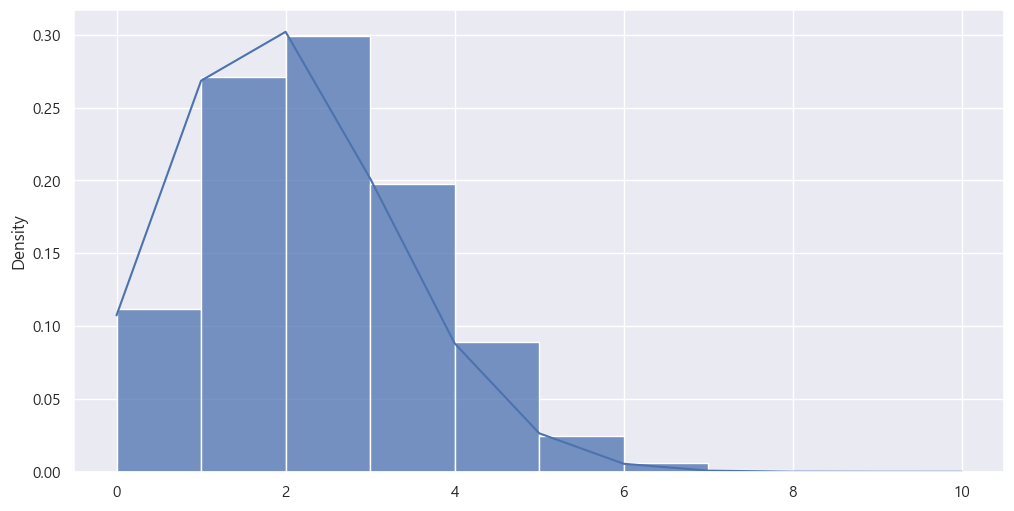

In [44]:
# 그래프로 그려본다
# 베루누이 시행을 통해 얻은 결과를 히스토그램으로 그려본다.
sns.histplot(binomial_result_array, bins=np.arange(0, 11), stat='density')
# 이항분포 확률 질량함수를 가지고 구한 각 확률은 꺽은선 그래프로 그린다.
sns.lineplot(x=n_success, y=probs, data=probs_df)
plt.show()

In [46]:
# 성공 확률 변화에 따른 확률 분포 변화
# 성공 횟수
n_success = np.arange(11)

# 확률
probs_01 = stats.binom.pmf(k=n_success, n=10, p=0.1)
probs_02 = stats.binom.pmf(k=n_success, n=10, p=0.2)
probs_05 = stats.binom.pmf(k=n_success, n=10, p=0.5)

# 데이터 프레임으로 정리
probs_df_2 = pd.DataFrame({
    'n_success' : n_success,
    '성공확률 0.1' : probs_01,
    '성공확률 0.2' : probs_02,
    '성공확률 0.5' : probs_05,
})

probs_df_2

,n_success,성공확률 0.1,성공확률 0.2,성공확률 0.5
0,0,3.486784e-01,1.073742e-01,0.000977
1,1,3.874205e-01,2.684355e-01,0.009766
2,2,1.937102e-01,3.019899e-01,0.043945
3,3,5.739563e-02,2.013266e-01,0.117188
4,4,1.116026e-02,8.808038e-02,0.205078
5,5,1.488035e-03,2.642412e-02,0.246094
6,6,1.377810e-04,5.505024e-03,0.205078
7,7,8.748000e-06,7.864320e-04,0.117187
8,8,3.645000e-07,7.372800e-05,0.043945
9,9,9.000000e-09,4.096000e-06,0.009766


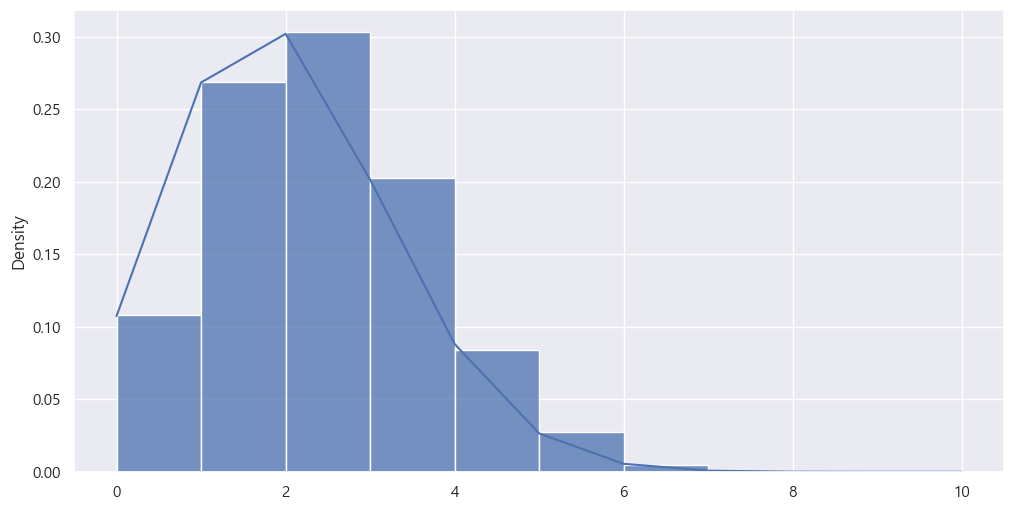

In [48]:
# 이항분포를 따르는 난수를 생성하는 함수
# 당첨확률이 0.2인 복원을 10장 뽑고 당첨 매수를 기록하는 시행을 5회 실시한 결과를
# 가져온다.(노가다인 베루누이시행을 해주는 함수)
np.random.seed(1)
array100 = stats.binom.rvs(p=0.2, n=10, size=10000)

# 그래프로 그려본다
# 베루누이 시행을 통해 얻은 결과를 히스토그램으로 그려본다.
sns.histplot(array100, bins=np.arange(0, 11), stat='density')
# 이항분포 확률 질량함수를 가지고 구한 각 확률은 꺽은선 그래프로 그린다.
probs_100 = stats.binom.pmf(k=n_success, n=10, p=0.2)
plt.plot(probs_100)
plt.show()

### 05_이항분포의 기댓값과 분산

In [51]:
# 이항 분포의 기대값 구현
# n = 10, p = 0.2 의 이항분포를 따르는 복권시뮬레이션을 대상으로 하여 당첨 매수의 평균값을
# 게산한다.
n = 10
p = 0.2
# 위에서 구한 1이 나온 횟수의 평균을 구한다.
x_bar = np.mean(binomial_result_array)
# 확률변수의 기대값을 구하는 공식 (n * p)을 통해 기대값을 계산한다.
print(f'난수의 평균 : {x_bar}')
print(f'이론적 기대값 : {n * p}')

난수의 평균 : 1.983
이론적 기대값 : 2.0


In [53]:
# stats.binom.mean 함수를 통해 구할 수도 있다.
stats.binom.mean(p=0.2, n=10)

2.0

In [55]:
# 이항분포 분산
u2 = np.var(binomial_result_array, ddof=0)
print(f'난수의 분산 : {u2}')
print(f'이론적 분산 : {n * p * (1 - p)}')

난수의 분산 : 1.6139109999999999
이론적 분산 : 1.6


In [57]:
# 이항분포분산을 구하는 함수
stats.binom.var(n=10, p=0.2)

1.6

### 06_이항분포의 누적분포함수

In [60]:
# 성공확률 0.2, 베르누이 시도 횟수 10, 성공 횟수 2회 이하)
stats.binom.cdf(k=2, n=10, p=0.2)

0.6777995263999999

In [62]:
# 확률 질량 함수와 누적 분포 함수 비교
# 확률질량함수와 누적분포함수의 대응 관계를 살펴보자
# 먼저 성공 횟수가 최소, 즉 0일 때
print(f'확률 질량 함수 : {stats.binom.pmf(k=0, n=10, p=0.2)}')
print(f'누적 분포 함수 : {stats.binom.cdf(k=0, n=10, p=0.2)}')

확률 질량 함수 : 0.10737418240000003
누적 분포 함수 : 0.10737418239999995


In [64]:
# 성공횟수가 1일때
print(f'확률 질량 함수 : {stats.binom.pmf(k=1, n=10, p=0.2)}')
print(f'누적 분포 함수 : {stats.binom.cdf(k=1, n=10, p=0.2)}')

확률 질량 함수 : 0.26843545599999996
누적 분포 함수 : 0.3758096384000002


In [70]:
PY
# 누적 분포 함수의 결과는 확률 질량 함수의 누적값이다.
pmf_0 = stats.binom.pmf(k=0, n=10, p=0.2)
pmf_1 = stats.binom.pmf(k=1, n=10, p=0.2)

print(f'확률 질량 함수 누적값 : {pmf_0 + pmf_1}')
print(f'누적 분포 함수 : {stats.binom.cdf(k=1, n=10, p=0.2)}')

NameError: name 'PY' is not defined

### 07_이항분포의 초과확률

In [73]:
# 누적 분포
print(stats.binom.cdf(k=1, n=10, p=0.2))
# 초과확률은 1에서 누적 분포를 빼준다.
print(1 - stats.binom.cdf(k=1, n=10, p=0.2))
# 초과 확률은 sf 함수를 가지고 구할 수 있다.
print(stats.binom.sf(k=1, n=10, p=0.2))

0.3758096384000002
0.6241903615999997
0.6241903615999997
